In [22]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import itertools
sns.set(style="darkgrid")

In [16]:
df1 = pd.read_csv('diagnosis-of-covid-19-and-its-clinical-spectrum.csv', skip_blank_lines = True)
df = df1.fillna(value=0)

In [17]:
def attribute_list():
    return list(df)

 Read in the data
-Processing?

 Create X matrix, y vector
-Train , test, split

 Machine learning
-Random Forest Classifier
-KNN Classifier


Metrics (ROC/AUC, confusion matrix)

In [18]:
def plot_confusion_matrix(x_label, predicted_label, normalize=False, colormap=plt.cm.Blues):
    return confusion_matrix(x_label,predicted_label)
    if normalize:
        c_matrix=c_matrix/c_matrix.sum(axis=1)[:,np.newaxis]
    x_unique=np.unique(x_label)
    predicted_unique=np.unique(predicted_label)
    c_matrixuni=np.union1d(x_unique,predicted_unique)
    x_complement=np.setxor1d(c_matrixuni,x_unique)
    predicted_complement=np.setxor1d(c_matrixuni,predicted_unique)
    x_complementlocation=np.zeros(len(x_complement))
  
    predicted_complementlocation=np.zeros(len(predicted_complement))
    for i,j in itertools.product(range(c_matrixuni.shape[0]),range(x_complement.shape[0])):
        if c_matrixuni[i]==x_complement[j]:
            x_complementlocation[j]=i
    for i,j in itertools.product(range(c_matrixuni.shape[0]),range(predicted_complement.shape[0])):
        if c_matrixuni[i]==predicted_complement[j]:
            predicted_complementlocation[j]=i
    c_matrix=np.delete(c_matrix, x_complementlocation,axis=0)
    c_matrix=np.delete(c_matrix,predicted_complementlocation,axis=1)
    plt.imshow(c_matrix, interpolation='none', cmap=colormap)
    plt.colorbar()
    plt.grid(False)
    plt.xticks(np.arange(0,int(predicted_unique.shape[0])),predicted_unique.astype(int),rotation=45)
    plt.yticks(np.arange(0,int(x_unique.shape[0])),x_unique,rotation=45)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Real Labels')
  
    for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
        plt.text(j,i,format(c_matrix[i,j],'d'), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white' if c_matrix[i,j]>np.max(c_matrix)/2 else 'black')
    plt.tight_layout() 

Accuracy (in percentage) of Random Forest Model
90.56687333923827
sklearn Accuracy Score
0.9056687333923826


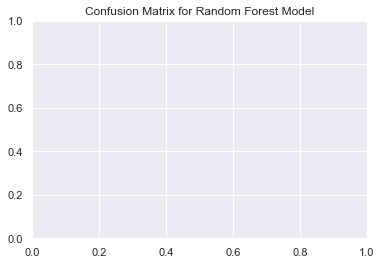

In [19]:
def rand_forest(pred_attr_index, feature_list):
    X = df.iloc[:,feature_list]
    y = df.iloc[:,pred_attr_index]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    num_right = 0
    y_predicted = model.predict(X_test)
    y_test_list = y_test.tolist()
    for i in range(y_predicted.shape[0]):
        if y_predicted[i] == y_test_list[i]:
            num_right = num_right + 1
    print("Accuracy (in percentage) of Random Forest Model")
    print(num_right * 100/y_predicted.shape[0])
    
    from sklearn.metrics import accuracy_score
    print('sklearn Accuracy Score')
    print(accuracy_score(y_test,y_predicted))
    
    _=plot_confusion_matrix(y_test, y_predicted)
    _=plt.title('Confusion Matrix for Random Forest Model')

feature_list = [1,6,7,8,9,10]
rand_forest(2, feature_list)

Accuracy (in percentage) of K Nearest Neighbors Model
86.89105403011514
sklearn Accuracy Score
0.8689105403011514


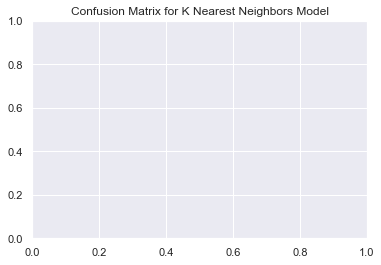

In [20]:
def k_neighbors(pred_attr_index, feature_list):
    X = df.iloc[:,feature_list]
    y = df.iloc[:,pred_attr_index]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    
    num_right = 0
    y_predicted = model.predict(X_test)
    y_test_list = y_test.tolist()
    for i in range(y_predicted.shape[0]):
        if y_predicted[i] == y_test_list[i]:
            num_right = num_right + 1
    print("Accuracy (in percentage) of K Nearest Neighbors Model")
    print(num_right * 100/y_predicted.shape[0])
    
    from sklearn.metrics import accuracy_score
    print('sklearn Accuracy Score')
    print(accuracy_score(y_test,y_predicted))
    
    _=plot_confusion_matrix(y_test, y_predicted)
    _=plt.title('Confusion Matrix for K Nearest Neighbors Model')

feature_list = [1,6,7,8,9,10]
k_neighbors(2, feature_list)

Accuracy (in percentage) of Gaussian Naive Bayes Model
87.466784765279
sklearn Accuracy Score
0.87466784765279


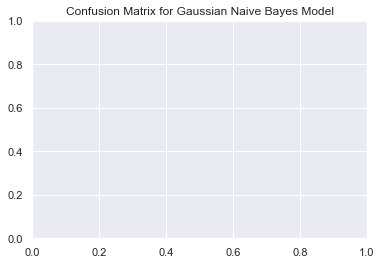

In [21]:
def naive_bayes(pred_attr_index, feature_list):
    X = df.iloc[:,feature_list]
    y = df.iloc[:,pred_attr_index]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
    model = GaussianNB()
    model.fit(X_train,y_train)
    
    num_right = 0
    y_predicted = model.predict(X_test)
    y_test_list = y_test.tolist()
    for i in range(y_predicted.shape[0]):
        if y_predicted[i] == y_test_list[i]:
            num_right = num_right + 1
    print("Accuracy (in percentage) of Gaussian Naive Bayes Model")
    print(num_right * 100/y_predicted.shape[0])
    
    from sklearn.metrics import accuracy_score
    print('sklearn Accuracy Score')
    print(accuracy_score(y_test,y_predicted))
    
    _=plot_confusion_matrix(y_test, y_predicted)
    _=plt.title('Confusion Matrix for Gaussian Naive Bayes Model')

feature_list = [1,6,7,8,9,10]
naive_bayes(2, feature_list)